In [55]:
#generar 3 senoides de dif frecuencia y sumarlas
#trabajar de forma continua, muestraer critico, sobre y submuestreo
import numpy as np
import matplotlib.pyplot as plt
import math
import random

introduce las frecuencias de las componentes de la señal separadas por un espacio: 40 150 360
introduce la frecuencia de muestreo: 500


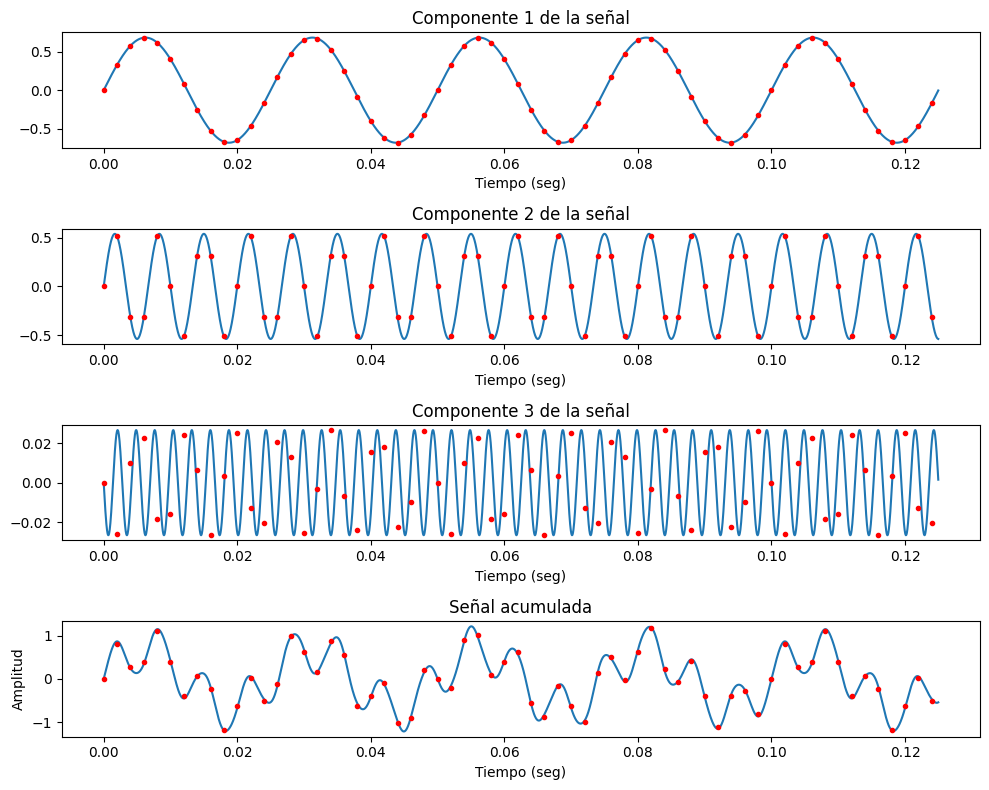

In [58]:
input_componentes = input("introduce las frecuencias de las componentes de la señal separadas por un espacio: ")
lista_componentes = input_componentes.split()
lista_componentes = [int(num) for num in lista_componentes]
#Teorema de muestreo
#periodo de muestreo
input_frec_muestreo = input("introduce la frecuencia de muestreo: ")
fs = int(input_frec_muestreo)
n = 1
#Asumir que la señal es periodica
#periodo de la señal
T = 1/lista_componentes[0]
#Vector de tiempos
inc = T/1000
t = np.arange(0,5*T,inc)
result_list = []
result_list_nueva = []
xt = 0
xn = 0
#Senoides de las componentes

#Frecuencia de muestreo (sobremuestreo, muestreo critico y submuestreo)
ts = 1/fs

#Se consigue el tiempo máximo de la duración de 1 señal
t_max = t[-1]
#Se consigue el tiempo mínimo de la duración de 1 señal
t_min = t[0]
# nuevo vector de tiempos
tn = np.arange(0,t_max,ts)


plt.figure(figsize=(10, 8))
for i, componente in enumerate(lista_componentes,start=1):
  a = random.uniform(-0.3,.90)
  x = a * np.sin(2*np.pi*componente*t)
  while 2*componente > fs:
    componente = abs(componente-(n)*fs)
    n =+ 1
  x_nueva = a * np.sin(2*np.pi*componente*tn)

  result_list.append(x)
  result_list_nueva.append(x_nueva)
  xt =+ x
  xn =+ x_nueva


  # Subplot para la señal actual
  plt.subplot(len(lista_componentes) + 1, 1, i)
  plt.plot(t, x)
  plt.title(f"Componente {i} de la señal")
  plt.xlabel("Tiempo (seg)")
  plt.tight_layout()

  #subplot para la señal actual discretizada
  plt.subplot(len(lista_componentes) + 1, 1, i)
  plt.plot(tn, x_nueva,'.r')
  plt.tight_layout()



suma_senal = sum(result_list)
suma_senal_nueva = sum(result_list_nueva)
# Subplot para la señal acumulada
plt.subplot(len(lista_componentes) + 1, 1, len(lista_componentes) + 1)
plt.plot(t, suma_senal)
plt.title("Señal acumulada")
plt.xlabel("Tiempo (seg)")
plt.ylabel("Amplitud")
plt.tight_layout()

plt.subplot(len(lista_componentes) + 1, 1, len(lista_componentes) + 1)
plt.plot(tn, suma_senal_nueva,'.r')

<ipython-input-60-ad460c75d424>:9: RuntimeWarning: invalid value encountered in divide
  xtn = xtn + suma_senal_nueva[n]*np.sin(np.pi*(fs*t-n))/(np.pi*(fs*t-n))


Text(0.5, 0, 'Tiempo (seg)')

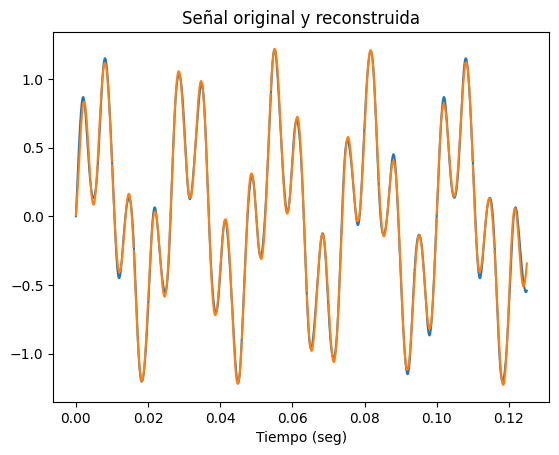

In [60]:
#reconstruccion de la señal
#tamaño de la señal muestreada (numero de muestras)
N = len(xn)
N
#Arreglo para guardar la señal reconstruida
xtn = np.zeros(len(xt))
#evaluamos ecuacion de whittaker-shannon
for n in range(0,N):
  xtn = xtn + suma_senal_nueva[n]*np.sin(np.pi*(fs*t-n))/(np.pi*(fs*t-n))
d = 0
for n in range(1,N):
  if math.isnan(xtn[n])==1:
    d = n
    break
for n in range(0,N):
  if d!= 0:
    xtn[n*d] = xn[n]

plt.figure(2)
plt.plot(t,suma_senal,t,xtn)
plt.title("Señal original y reconstruida")
plt.xlabel("Tiempo (seg)")

In [61]:
from scipy.interpolate import CubicSpline
# Interpolación cúbica de la señal muestreada
spline_interpolation = CubicSpline(tn, suma_senal_nueva)

In [62]:
# Evaluación de la señal interpolada en el tiempo original
xtn_spline = spline_interpolation(t)

Text(0.5, 0, 'Tiempo (seg)')

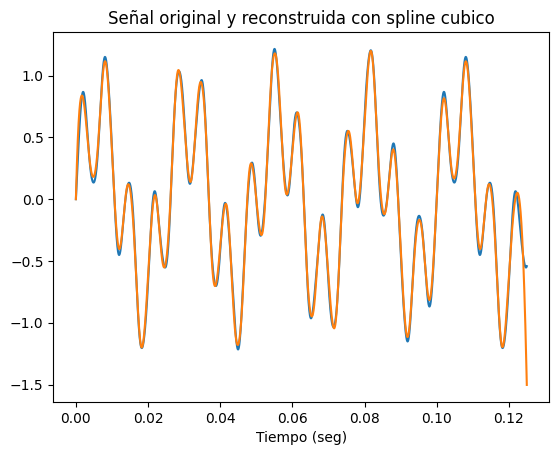

In [63]:
plt.plot(t,suma_senal,t, xtn_spline)
plt.title("Señal original y reconstruida con spline cubico")
plt.xlabel("Tiempo (seg)")